# Task 3: Helper notebook for loading the data and saving the predictions

In [1]:
import pickle
import gzip
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
import cv2
import shutil
import time

/Users/rcasado/Desktop/Rodrigo_work/Universidad/PhD/Other/Coding/Visual Studio Code/.venv/lib/python3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


### Helper functions

In [2]:
def load_zipped_pickle(filename):
    with gzip.open(filename, 'rb') as f:
        loaded_object = pickle.load(f)
        return loaded_object

In [3]:
def save_zipped_pickle(obj, filename):
    with gzip.open(filename, 'wb') as f:
        pickle.dump(obj, f, 2)

### Load data, make predictions and save prediction in correct format

In [5]:
# load data
train_data = load_zipped_pickle("train.pkl")
test_data = load_zipped_pickle("test.pkl")
samples = load_zipped_pickle("sample.pkl")

In [28]:
# make prediction for test
predictions = []
for d in test_data:
    prediction = np.array(np.ones_like(d['video']), dtype=bool)
    height = prediction.shape[0]
    width = prediction.shape[1]
    prediction[int(height/2)-50:int(height/2+50), int(width/2)-50:int(width/2+50)] = True
    
    # DATA Strucure
    predictions.append({
        'name': d['name'],
        'prediction': prediction
        }
    )

IndentationError: unexpected indent (3364962772.py, line 2)

In [6]:
# save in correct format
save_zipped_pickle(predictions, 'my_predictions.pkl')

In [6]:
len(train_data), len(test_data)

(65, 20)

In [ ]:
test_data[0].keys()

dict_keys(['name', 'video'])

In [31]:
print(f'TEST DATA: {len(test_data)} measurements')
for d in test_data:
    print(d['name'], d['video'].shape)

TEST DATA: 20 measurements
E9AHVWGBUF (586, 821, 103)
H7G0BX4HFV (587, 791, 52)
8FKMSXTPSJ (583, 777, 69)
JANFS05F33 (582, 851, 61)
O7WUJ71C15 (732, 845, 53)
1XHV0Q88M5 (583, 809, 84)
401JD35E1A (582, 737, 78)
VODEK84RH4 (587, 775, 125)
ONA22CCCFQ (730, 956, 76)
7UXIXUBK2G (587, 781, 104)
ESY800XYMN (583, 681, 68)
571G03ZYDA (587, 713, 90)
QZA3WA0E2X (587, 612, 78)
JQX264DTZ0 (587, 773, 73)
TYM0IJW004 (707, 855, 39)
CD4RIAOCHG (731, 1007, 72)
D271IBSMUW (583, 780, 106)
0MVRNDWR1G (583, 670, 63)
1QSFD8ORNM (594, 745, 51)
UB7LFQKZT5 (583, 779, 62)


In [32]:
train_data[0].keys()

dict_keys(['name', 'video', 'box', 'label', 'frames', 'dataset'])

In [33]:
print(f'TRAIN DATA: {len(train_data)} measurements')
for d in train_data:
    print(f"{d['name']}: video {d['video'].shape}, box {d['box'].shape}, label {d['label'].shape}, frames {d['frames']}, dataset {d['dataset']}")

TRAIN DATA: 65 measurements
D47OR19ANJ: video (112, 112, 334), box (112, 112), label (112, 112, 334), frames [15, 59, 143], dataset amateur
IMNKTJV3OI: video (112, 112, 177), box (112, 112), label (112, 112, 177), frames [2, 47, 79], dataset amateur
YSCCEISFRH: video (112, 112, 195), box (112, 112), label (112, 112, 195), frames [18, 83, 131], dataset amateur
VI47TJR3OQ: video (112, 112, 181), box (112, 112), label (112, 112, 181), frames [19, 118, 180], dataset amateur
7V9NY3JFPX: video (112, 112, 211), box (112, 112), label (112, 112, 211), frames [36, 76, 134], dataset amateur
K3AM1YOI38: video (112, 112, 209), box (112, 112), label (112, 112, 209), frames [22, 51, 129], dataset amateur
BBB0U709D2: video (112, 112, 129), box (112, 112), label (112, 112, 129), frames [16, 85, 121], dataset amateur
DTKPN7XP6M: video (112, 112, 179), box (112, 112), label (112, 112, 179), frames [15, 58, 122], dataset amateur
7IBG80WR2T: video (112, 112, 168), box (112, 112), label (112, 112, 168), fra

In [7]:
dataset = [d['dataset'] for d in train_data]
pd.Series(dataset).value_counts()

amateur    46
expert     19
Name: count, dtype: int64

In [35]:
all([d['video'].shape[:2] == d['box'].shape[:2] and d['video'].shape == d['label'].shape for d in train_data])

True

In [36]:
print(f'TRAIN DATA: {len(train_data)} measurements')
for d in train_data:
    print(f"{d['name']}: video {d['video'].shape}, frames {d['frames']}, dataset {d['dataset']}")

TRAIN DATA: 65 measurements
D47OR19ANJ: video (112, 112, 334), frames [15, 59, 143], dataset amateur
IMNKTJV3OI: video (112, 112, 177), frames [2, 47, 79], dataset amateur
YSCCEISFRH: video (112, 112, 195), frames [18, 83, 131], dataset amateur
VI47TJR3OQ: video (112, 112, 181), frames [19, 118, 180], dataset amateur
7V9NY3JFPX: video (112, 112, 211), frames [36, 76, 134], dataset amateur
K3AM1YOI38: video (112, 112, 209), frames [22, 51, 129], dataset amateur
BBB0U709D2: video (112, 112, 129), frames [16, 85, 121], dataset amateur
DTKPN7XP6M: video (112, 112, 179), frames [15, 58, 122], dataset amateur
7IBG80WR2T: video (112, 112, 168), frames [22, 135, 154], dataset amateur
1D7PVKV2AP: video (112, 112, 151), frames [0, 29, 139], dataset amateur
IJN60PIITZ: video (112, 112, 113), frames [21, 94, 110], dataset amateur
5NJTVZ6ZOJ: video (112, 112, 214), frames [60, 85, 146], dataset amateur
R5OV0RKYDG: video (112, 112, 151), frames [14, 77, 141], dataset amateur
YTEBHX6SH5: video (112, 

In [37]:
samples[0].keys()

dict_keys(['name', 'prediction'])

In [38]:
print(f'TRAIN SAMPLE DATA: {len(samples)} measurements')
for d in samples:
    print(d['name'], d['prediction'].shape)

TRAIN SAMPLE DATA: 20 measurements
E9AHVWGBUF (586, 821, 103)
H7G0BX4HFV (587, 791, 52)
8FKMSXTPSJ (583, 777, 69)
JANFS05F33 (582, 851, 61)
O7WUJ71C15 (732, 845, 53)
1XHV0Q88M5 (583, 809, 84)
401JD35E1A (582, 737, 78)
VODEK84RH4 (587, 775, 125)
ONA22CCCFQ (730, 956, 76)
7UXIXUBK2G (587, 781, 104)
ESY800XYMN (583, 681, 68)
571G03ZYDA (587, 713, 90)
QZA3WA0E2X (587, 612, 78)
JQX264DTZ0 (587, 773, 73)
TYM0IJW004 (707, 855, 39)
CD4RIAOCHG (731, 1007, 72)
D271IBSMUW (583, 780, 106)
0MVRNDWR1G (583, 670, 63)
1QSFD8ORNM (594, 745, 51)
UB7LFQKZT5 (583, 779, 62)


In [39]:
train_data[0]['video'].max(), train_data[0]['video'].min()

(255, 0)

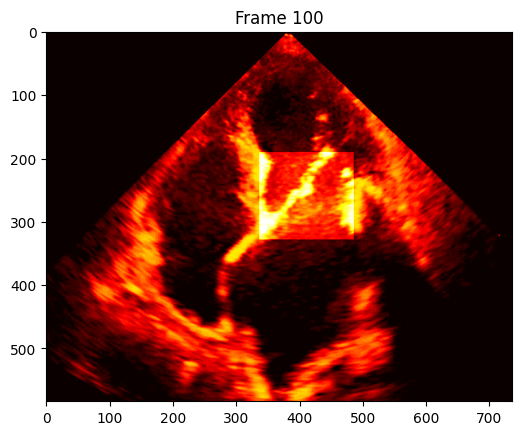

In [19]:
index =  len(train_data)-7
sleep_time = 5

box = train_data[index]['box']
frames = train_data[index]['frames']
label = train_data[index]['label']

plt.figure()
for i in range(train_data[index]['video'].shape[2]):

    image = train_data[index]['video'][:,:,i] + box*100

    if i in frames:
        image += label[:,:,i]*400
        plt.imshow(image, cmap='hot', vmin=0, vmax=755)
        plt.title('Frame %d' % i)
        plt.show()
        clear_output(wait=True)
        time.sleep(sleep_time)
        continue

    plt.imshow(image, cmap='hot', vmin=0, vmax=355)
    plt.title('Frame %d' % i)
    plt.show()
    clear_output(wait=True)

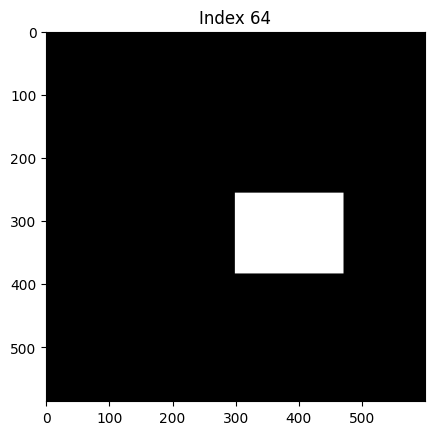

In [20]:
plt.figure()
for i in range(len(train_data)):
    plt.imshow(train_data[i]['box'], cmap='gray', vmin=0, vmax=1)
    plt.title('Index %d' % i)
    plt.show()
    clear_output(wait=True)

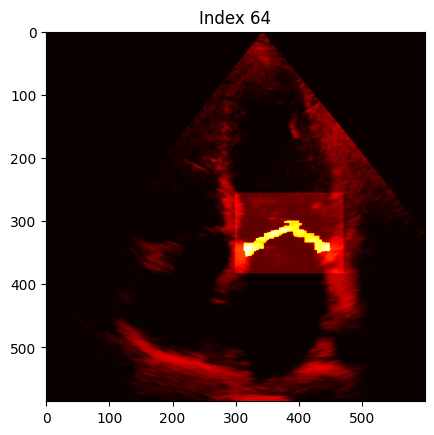

In [22]:
plt.figure()
for index in range(len(train_data)):

    box = train_data[index]['box']
    frames = train_data[index]['frames']
    label = train_data[index]['label']

    for f in range(3):
        image = train_data[index]['video'][:,:,frames[f]] + box*100 + label[:,:,frames[f]]*400
        plt.imshow(image, cmap='hot', vmin=0, vmax=755)
        plt.title('Index %d' % index)
        plt.show()
        clear_output(wait=True)
        time.sleep(.3)

In [40]:
IMG_SIZE = (112, 112)

In [41]:
len(train_data)//7

9

In [9]:
directory = '/Users/rcasado/Desktop/Rodrigo_work/Universidad/PhD/Other/Coding/Visual Studio Code/AML/task3/images'

def reset(directory = directory):
    if os.path.exists(directory):
        shutil.rmtree(directory)

    if not os.path.exists(directory):
        os.makedirs(directory)

    for folder in ['train', 'val', 'test', 'all']:
        for ending in ['', '_label', '_box']:
            subdirectory = directory + '/' + folder + '/train' + ending + '/images'
            os.makedirs(subdirectory)

In [39]:
directory2 = directory + '_only_test'
reset(directory2)

In [43]:
reset()

In [13]:
counts = pd.Series(dataset).value_counts()

counts.values, [46, 5* 19]

(array([46, 19]), [46, 95])

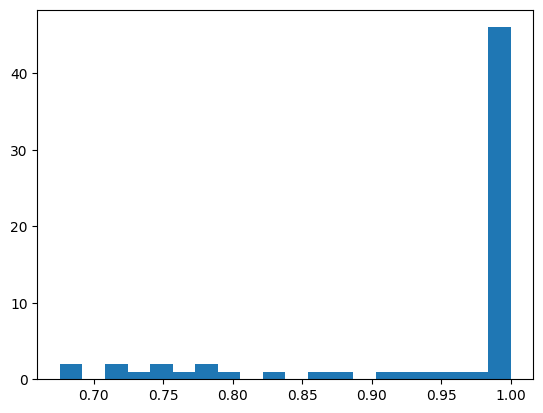

In [30]:
plt.hist(list(d['box'].shape[0]/d['box'].shape[1] for d in train_data), bins=20);

In [43]:
from IPython.display import clear_output
sleep_time = 1


plt.figure()
for index in range(len(train_data))[::-1]:
    box = train_data[index]['box']
    frame = train_data[index]['frames'][0]
    label = train_data[index]['label'][:,:,frame]

    image = train_data[index]['video'][:,:,frame] + box*100 + label*100

    plt.imshow(image, cmap='hot')
    plt.title('Im %d' % index)
    plt.show()
    clear_output(wait=True)
    time.sleep(sleep_time)



KeyboardInterrupt: 

In [104]:
IMG_SIZE = 64*10# max(max(set(d['box'].shape[0] for d in train_data)), max(set(d['box'].shape[1] for d in train_data))) //64*64 // 1

IMG_SIZE = (IMG_SIZE, IMG_SIZE)

IMG_SIZE

(640, 640)

In [105]:
directory2 = '/Users/rcasado/Desktop/Rodrigo_work/Universidad/PhD/Other/Coding/Visual Studio Code/AML/task3/images_big'
directory3 = '/Users/rcasado/Desktop/Rodrigo_work/Universidad/PhD/Other/Coding/Visual Studio Code/AML/task3/images_only_expert'

In [106]:
reset(directory2)
reset(directory3)

In [107]:
for index in range(len(train_data)):

    box = train_data[index]['box']
    frames = train_data[index]['frames']
    video = train_data[index]['video'][:,:,frames]
    label = train_data[index]['label'][:,:,frames]

    for f in range(3):
        for ending in ['', '_label', '_box']:

            if (index % 5) == 0:
                folder = '/val'
            else:
                folder = '/train'

            if train_data[index]['dataset'] != 'expert':
                continue

            filename = directory2 + folder + '/train' + ending + '/images' + f'/{train_data[index]["name"]}_num{f}' + '.png'

            if ending == '':
                im_gray = video[:,:,f]
                im_gray = cv2.resize(im_gray, IMG_SIZE, interpolation = cv2.INTER_AREA).astype(np.uint8)
            elif ending == '_label':
                im_gray = (label[:,:,f]*255).astype(np.uint8)
                im_gray = cv2.resize(im_gray, IMG_SIZE, interpolation = cv2.INTER_AREA)
                im_gray = np.where(im_gray>0, 255, 0).astype(np.uint8)
            elif ending == '_box':
                im_gray = (box*255).astype(np.uint8)
                im_gray = cv2.resize(im_gray, IMG_SIZE, interpolation = cv2.INTER_AREA)
                im_gray = np.where(im_gray>0, 255, 0).astype(np.uint8)
            
            cv2.imwrite(filename, im_gray)

In [108]:
for index in range(len(train_data)):

    box = train_data[index]['box']
    frames = train_data[index]['frames']
    video = train_data[index]['video'][:,:,frames]
    label = train_data[index]['label'][:,:,frames]

    for f in range(3):
        for ending in ['', '_label', '_box']:

            if (index % 5) == 0:
                folder = '/val'
            else:
                folder = '/train'

            if train_data[index]['dataset'] != 'expert':
                continue

            filename = directory3 + folder + '/train' + ending + '/images' + f'/{train_data[index]["name"]}_num{f}' + '.png'

            if ending == '':
                im_gray = video[:,:,f]
                im_gray = cv2.resize(im_gray, IMG_SIZE, interpolation = cv2.INTER_AREA).astype(np.uint8)
            elif ending == '_label':
                im_gray = (label[:,:,f]*255).astype(np.uint8)
                im_gray = cv2.resize(im_gray, IMG_SIZE, interpolation = cv2.INTER_AREA)
                im_gray = np.where(im_gray>0, 255, 0).astype(np.uint8)
            elif ending == '_box':
                im_gray = (box*255).astype(np.uint8)
                im_gray = cv2.resize(im_gray, IMG_SIZE, interpolation = cv2.INTER_AREA)
                im_gray = np.where(im_gray>0, 255, 0).astype(np.uint8)
            
            cv2.imwrite(filename, im_gray)

copies_expert = 5

for index in range(len(train_data)):

    box = train_data[index]['box']
    frames = train_data[index]['frames']
    video = train_data[index]['video'][:,:,frames]
    label = train_data[index]['label'][:,:,frames]

    for f in range(3):
        for ending in ['', '_label', '_box']:

            if (index % 7) == 0:
                folder = '/val'
            else:
                folder = '/train'

            if train_data[index]['dataset'] == 'expert':
                reps = [''] + [f'_copy{i+1}' for i in range(copies_expert-1)]
            else:
                reps = ['']

            for r in reps:
                filename = directory2 + folder + '/train' + ending + '/images' + f'/{train_data[index]["name"]}_num{f}' + r + '.png'

                if ending == '':
                    im_gray = video[:,:,f]
                    im_gray = cv2.resize(im_gray, IMG_SIZE, interpolation = cv2.INTER_AREA).astype(np.uint8)
                elif ending == '_label':
                    im_gray = (label[:,:,f]*255).astype(np.uint8)
                    im_gray = cv2.resize(im_gray, IMG_SIZE, interpolation = cv2.INTER_AREA)
                    im_gray = np.where(im_gray>0, 255, 0).astype(np.uint8)
                elif ending == '_box':
                    im_gray = (box*255).astype(np.uint8)
                    im_gray = cv2.resize(im_gray, IMG_SIZE, interpolation = cv2.INTER_AREA)
                    im_gray = np.where(im_gray>0, 255, 0).astype(np.uint8)
                
                cv2.imwrite(filename, im_gray)

In [109]:
folder = '/test'

for index in range(len(test_data)):

    video = train_data[index]['video']

    for f in range(video.shape[2]):
        filename = directory2 + folder + '/train/images' + f'/{test_data[index]["name"]}_num{f}.png'

        im_gray = video[:,:,f]
        im_gray = cv2.resize(im_gray, IMG_SIZE, interpolation = cv2.INTER_AREA).astype(np.uint8)
        cv2.imwrite(filename, im_gray)

filename = '/Users/rcasado/Desktop/Rodrigo_work/Universidad/PhD/Other/Coding/Visual Studio Code/AML/task3/images/train/train_box/images/0S1GBHENTP_num0.png'
im_gray = cv2.imread(filename, flags=cv2.IMREAD_GRAYSCALE)
assert all([all([pix in [0,255] for pix in im_gray.reshape(-1).tolist()]) for ind in range(len(train_data))])

In [110]:
folder = '/all'

for index in range(len(train_data)):

    box = train_data[index]['box']
    frames = train_data[index]['frames']
    video = train_data[index]['video'][:,:,frames]
    label = train_data[index]['label'][:,:,frames]

    for f in range(3):
        for ending in ['', '_label', '_box']:

            # if train_data[index]['dataset'] != 'expert':
            #     continue

            filename = directory2 + folder + '/train' + ending + '/images' + f'/{train_data[index]["name"]}_num{f}' + '.png'

            if ending == '':
                im_gray = video[:,:,f]
                im_gray = cv2.resize(im_gray, IMG_SIZE, interpolation = cv2.INTER_AREA).astype(np.uint8)
            elif ending == '_label':
                im_gray = (label[:,:,f]*255).astype(np.uint8)
                im_gray = cv2.resize(im_gray, IMG_SIZE, interpolation = cv2.INTER_AREA)
                im_gray = np.where(im_gray>0, 255, 0).astype(np.uint8)
            elif ending == '_box':
                im_gray = (box*255).astype(np.uint8)
                im_gray = cv2.resize(im_gray, IMG_SIZE, interpolation = cv2.INTER_AREA)
                im_gray = np.where(im_gray>0, 255, 0).astype(np.uint8)
            
            cv2.imwrite(filename, im_gray)

In [111]:
folder = '/all'

for index in range(len(train_data)):

    box = train_data[index]['box']
    frames = train_data[index]['frames']
    video = train_data[index]['video'][:,:,frames]
    label = train_data[index]['label'][:,:,frames]

    for f in range(3):
        for ending in ['', '_label', '_box']:

            if train_data[index]['dataset'] != 'expert':
                continue

            filename = directory3 + folder + '/train' + ending + '/images' + f'/{train_data[index]["name"]}_num{f}' + '.png'

            if ending == '':
                im_gray = video[:,:,f]
                im_gray = cv2.resize(im_gray, IMG_SIZE, interpolation = cv2.INTER_AREA).astype(np.uint8)
            elif ending == '_label':
                im_gray = (label[:,:,f]*255).astype(np.uint8)
                im_gray = cv2.resize(im_gray, IMG_SIZE, interpolation = cv2.INTER_AREA)
                im_gray = np.where(im_gray>0, 255, 0).astype(np.uint8)
            elif ending == '_box':
                im_gray = (box*255).astype(np.uint8)
                im_gray = cv2.resize(im_gray, IMG_SIZE, interpolation = cv2.INTER_AREA)
                im_gray = np.where(im_gray>0, 255, 0).astype(np.uint8)
            
            cv2.imwrite(filename, im_gray)

In [44]:
from keras.preprocessing.image import ImageDataGenerator

rotation_range = 10
width_shift_range = 0.1
height_shift_range = 0.1
shear_range = 0.1
zoom_range = 0.1
seed = 1

batch_size = 30

def preprocessing_function(x):
    x = (x / 255. - 0.5) * 2.
    # x = elastic_transform(x, alpha_range=alpha_range, sigma=sigma)
    return x

def preprocessing_function_label(x):
    x = (x/255.).astype(np.bool_).reshape(IMG_SIZE[0], IMG_SIZE[1], 1)
    return x

def obtain_datagenerator(directory, preprocessing_function, batch_size=batch_size, seed=seed, rotation_range=rotation_range, width_shift_range=width_shift_range, height_shift_range=height_shift_range, shear_range=shear_range, zoom_range=zoom_range, IMG_SIZE=IMG_SIZE):

    datagen = ImageDataGenerator(
        rotation_range=rotation_range,
        width_shift_range=height_shift_range,
        height_shift_range=height_shift_range,
        shear_range=shear_range,
        zoom_range=zoom_range,
        preprocessing_function=preprocessing_function,
    )

    generator = datagen.flow_from_directory(
        directory,
        target_size=IMG_SIZE,
        batch_size=batch_size,
        color_mode='grayscale',
        class_mode=None,
        seed = seed,
    )

    return generator

def obtain_test_datagenerator(directory, preprocessing_function, IMG_SIZE=IMG_SIZE):

    datagen = ImageDataGenerator(
        preprocessing_function=preprocessing_function,
    )

    generator = datagen.flow_from_directory(
        directory,
        target_size=IMG_SIZE,
        batch_size=batch_size,
        color_mode='grayscale',
        class_mode=None,
        seed = seed,
    )

    return generator


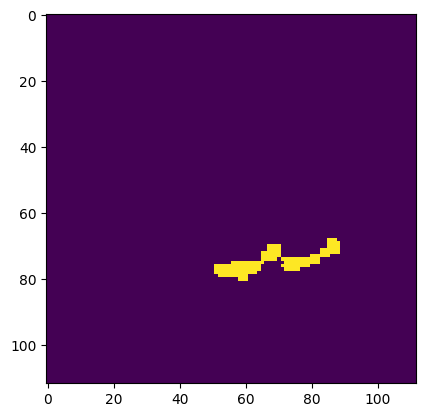

In [45]:
img = cv2.imread('/Users/rcasado/Desktop/Rodrigo_work/Universidad/PhD/Other/Coding/Visual Studio Code/AML/task3/images/train/train_label/images/0S1GBHENTP_num0.png', flags=cv2.IMREAD_GRAYSCALE)
img = (img/255.).astype(np.bool_)
plt.imshow(img)

In [46]:
directory = directory2

# TRAIN
# IMAGES
train_generator = obtain_datagenerator(directory + '/train/train', preprocessing_function)

# LABELS
train_mask_generator = obtain_datagenerator(directory + '/train/train_label', preprocessing_function_label)

# BOXES
train_box_generator = obtain_datagenerator(directory + '/train/train_box', preprocessing_function_label)

# VAL
# IMAGES
val_generator = obtain_datagenerator(directory + '/val/train', preprocessing_function)

# LABELS
val_mask_generator = obtain_datagenerator(directory + '/val/train_label', preprocessing_function_label)

# BOXES
val_box_generator = obtain_datagenerator(directory + '/val/train_box', preprocessing_function_label)

# TEST
# IMAGES
test_generator = obtain_test_datagenerator(directory + '/test/train', preprocessing_function)

# LABELS
test_mask_generator = obtain_test_datagenerator(directory + '/test/train_label', preprocessing_function_label)

# BOXES
test_box_generator = obtain_test_datagenerator(directory + '/test/train_box', preprocessing_function_label)

Found 57 images belonging to 1 classes.


Found 57 images belonging to 1 classes.
Found 57 images belonging to 1 classes.
Found 0 images belonging to 1 classes.
Found 0 images belonging to 1 classes.
Found 0 images belonging to 1 classes.
Found 0 images belonging to 1 classes.
Found 0 images belonging to 1 classes.
Found 0 images belonging to 1 classes.


In [47]:
def my_image_mask_generator(image_data_generator, mask_data_generator):
    train_generator = zip(image_data_generator, mask_data_generator)
    for (img, mask) in train_generator:
        yield (img, mask)

In [48]:
train_batches = my_image_mask_generator(train_generator, train_mask_generator)

val_batches = my_image_mask_generator(val_generator, val_mask_generator)

In [49]:
a = next(train_batches)

a[0][0].max(), a[0][0].min(), a[1][0].max(), a[1][0].min()

(0.9985136, -1.0, 1.0, 0.0)

In [50]:
set(a[1][0].reshape(-1).tolist())

{0.0, 1.0}

In [51]:
a[0].shape

(30, 832, 832, 1)

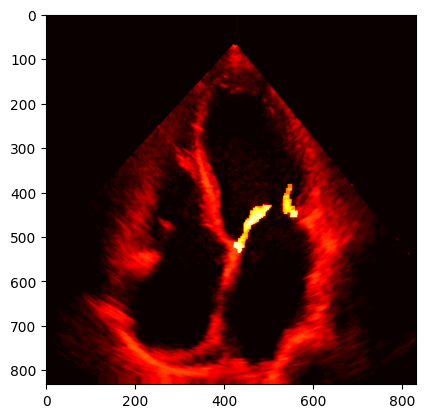

In [54]:
from IPython.display import clear_output
import time

for i in range(30):
    plt.imshow(a[0][i] + 2*a[1][i], cmap='hot', vmin=-1, vmax=3)
    plt.show()
    clear_output(wait=True)
    time.sleep(.5)

In [242]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np

train_dataset = dataset["train"].map(load_image_train, num_parallel_calls=tf.data.AUTOTUNE)
test_dataset = dataset["test"].map(load_image_test, num_parallel_calls=tf.data.AUTOTUNE)

BUFFER_SIZE = 1000
train_batches = train_dataset.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()
train_batches = train_batches.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
validation_batches = test_dataset.take(3000).batch(BATCH_SIZE)
test_batches = test_dataset.skip(3000).take(669).batch(BATCH_SIZE)

In [244]:
def double_conv_block(x, n_filters):

   # Conv2D then ReLU activation
   x = layers.Conv2D(n_filters, 3, padding = "same", activation = "relu", kernel_initializer = "he_normal")(x)
   # Conv2D then ReLU activation
   x = layers.Conv2D(n_filters, 3, padding = "same", activation = "relu", kernel_initializer = "he_normal")(x)

   return x

In [245]:
def downsample_block(x, n_filters):
   f = double_conv_block(x, n_filters)
   p = layers.MaxPool2D(2)(f)
   p = layers.Dropout(0.3)(p)

   return f, p

In [246]:
def upsample_block(x, conv_features, n_filters):
   # upsample
   x = layers.Conv2DTranspose(n_filters, 3, 2, padding="same")(x)
   # concatenate
   x = layers.concatenate([x, conv_features])
   # dropout
   x = layers.Dropout(0.3)(x)
   # Conv2D twice with ReLU activation
   x = double_conv_block(x, n_filters)

   return x

In [470]:
def build_unet_model():
 # inputs
   inputs = layers.Input(shape=IMG_SIZE + (1,))

   # encoder: contracting path - downsample
   # 1 - downsample
   f1, p1 = downsample_block(inputs, 64)
   # 2 - downsample
   f2, p2 = downsample_block(p1, 128)
   # 3 - downsample
   f3, p3 = downsample_block(p2, 256)
   # 4 - downsample
   f4, p4 = downsample_block(p3, 512)

   # 5 - bottleneck
   bottleneck = double_conv_block(p4, 1024)

   # decoder: expanding path - upsample
   # 6 - upsample
   u6 = upsample_block(bottleneck, f4, 512)
   # 7 - upsample
   u7 = upsample_block(u6, f3, 256)
   # 8 - upsample
   u8 = upsample_block(u7, f2, 128)
   # 9 - upsample
   u9 = upsample_block(u8, f1, 64)

   # outputs
   outputs = layers.Conv2D(1, 1, padding="same", activation = "sigmoid")(u9)

   # unet model with Keras Functional API
   unet_model = tf.keras.Model(inputs, outputs, name="U-Net")

   return unet_model

unet_model = build_unet_model()

In [471]:
print(unet_model.summary())

Model: "U-Net"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_7 (InputLayer)        [(None, 112, 112, 1)]        0         []                            
                                                                                                  
 conv2d_114 (Conv2D)         (None, 112, 112, 64)         640       ['input_7[0][0]']             
                                                                                                  
 conv2d_115 (Conv2D)         (None, 112, 112, 64)         36928     ['conv2d_114[0][0]']          
                                                                                                  
 max_pooling2d_24 (MaxPooli  (None, 56, 56, 64)           0         ['conv2d_115[0][0]']          
 ng2D)                                                                                        

In [472]:
unet_model.compile(optimizer=tf.keras.optimizers.legacy.Adam(),
                  loss="binary_crossentropy",
                  metrics="accuracy")

In [473]:
# Set the seed using keras.utils.set_random_seed. This will set:
# 1) `numpy` seed
# 2) backend random seed
# 3) `python` random seed
keras.utils.set_random_seed(seed)

In [474]:
NUM_EPOCHS = 100

STEPS_PER_EPOCH = (165 // batch_size) * 5
VALIDATION_STEPS = 30 // batch_size

model_history = unet_model.fit(train_batches,
                              epochs=NUM_EPOCHS,
                              steps_per_epoch=STEPS_PER_EPOCH,
                              validation_steps=VALIDATION_STEPS,
                              validation_data=val_batches)

Epoch 1/100
25/25 [==============================] - 8s 265ms/step - loss: 3.8505 - accuracy: 0.9525 - val_loss: 0.1062 - val_accuracy: 0.9854
Epoch 2/100
25/25 [==============================] - 6s 225ms/step - loss: 0.0817 - accuracy: 0.9871 - val_loss: 0.0805 - val_accuracy: 0.9859
Epoch 3/100
25/25 [==============================] - 6s 221ms/step - loss: 0.0699 - accuracy: 0.9870 - val_loss: 0.0737 - val_accuracy: 0.9855
Epoch 4/100
25/25 [==============================] - 5s 222ms/step - loss: 0.0516 - accuracy: 0.9870 - val_loss: 0.0529 - val_accuracy: 0.9855
Epoch 5/100
25/25 [==============================] - 6s 221ms/step - loss: 0.0413 - accuracy: 0.9871 - val_loss: 0.0468 - val_accuracy: 0.9854
Epoch 6/100
25/25 [==============================] - 6s 219ms/step - loss: 0.0347 - accuracy: 0.9878 - val_loss: 0.0539 - val_accuracy: 0.9859
Epoch 7/100
25/25 [==============================] - 6s 220ms/step - loss: 0.0280 - accuracy: 0.9899 - val_loss: 0.0427 - val_accuracy: 0.9864

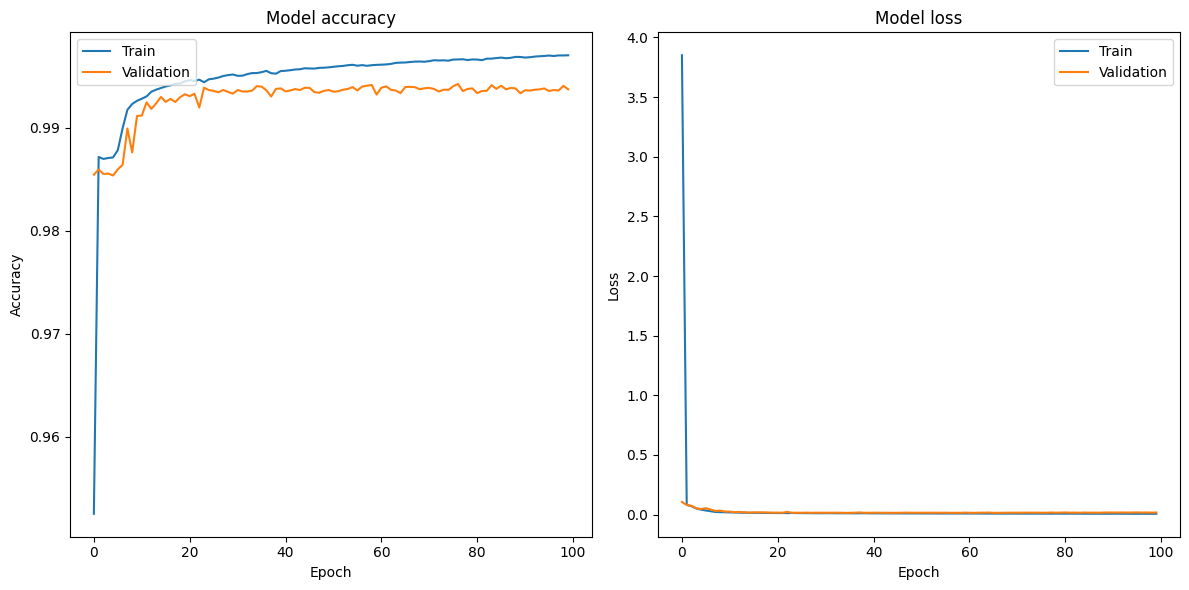

In [475]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.tight_layout()
plt.show()

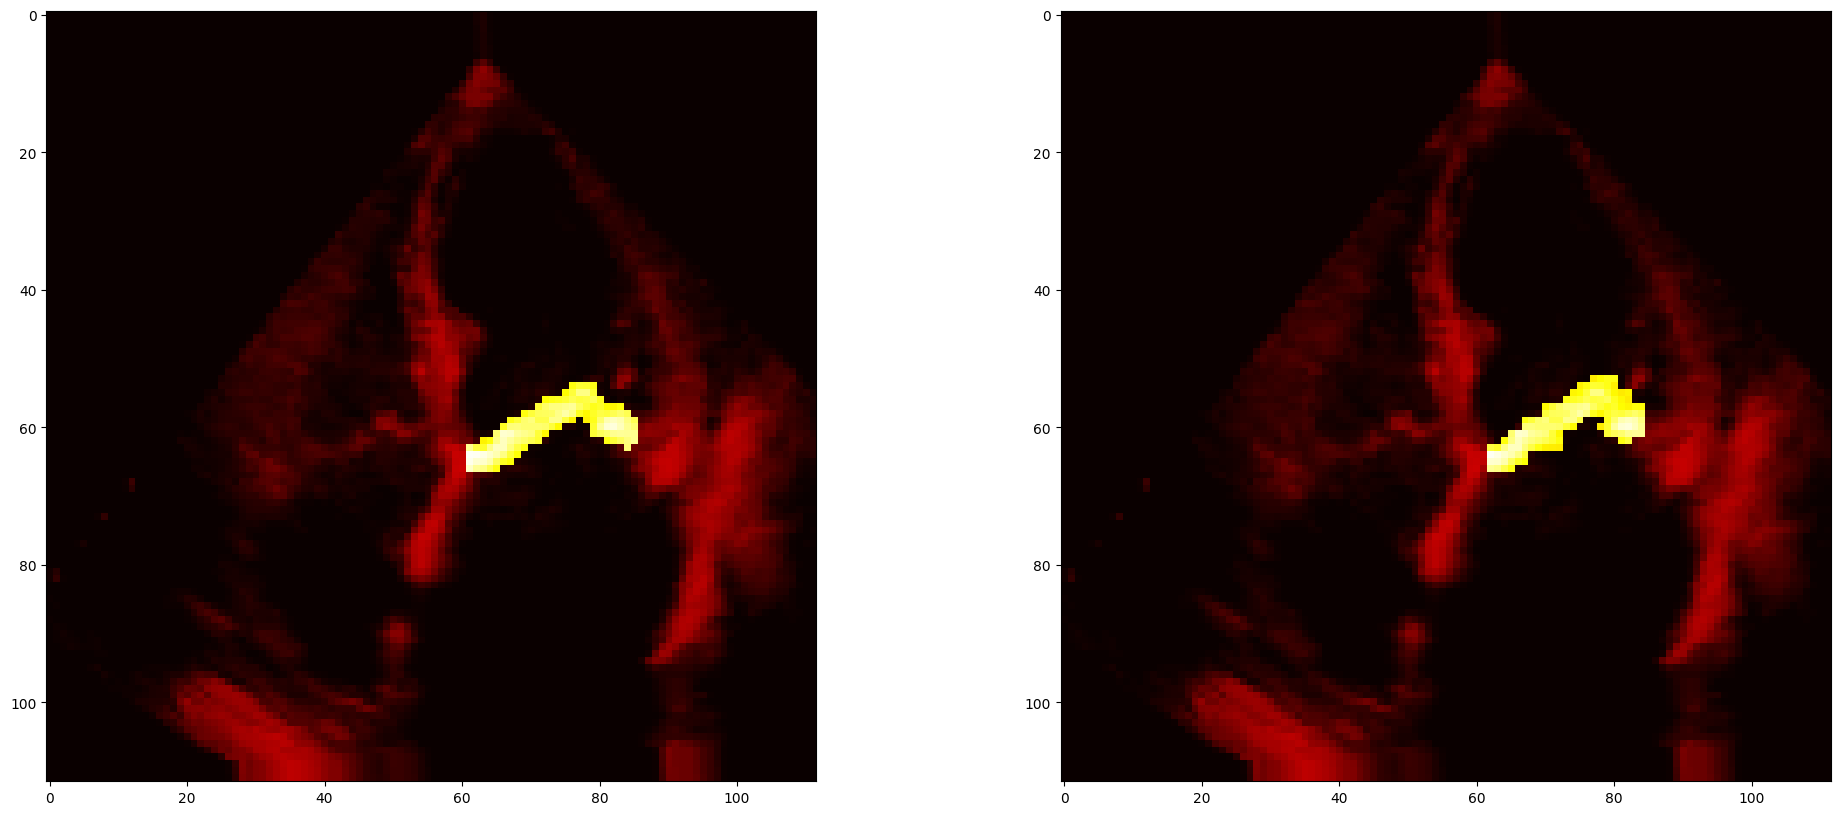

In [479]:
a = next(val_batches)
b = np.where(unet_model.predict(a[0])>0.5, 1, 0)

for i in range(batch_size):
    plt.figure(figsize=(24, 10))
    plt.subplot(1, 2, 1)
    plt.imshow(a[0][i] + 5*b[i], cmap='hot', vmin=-1, vmax=6)
    plt.subplot(1, 2, 2)
    plt.imshow(a[0][i] + 5*a[1][i], cmap='hot', vmin=-1, vmax=6)
    plt.show()
    clear_output(wait=True)
    time.sleep(1)

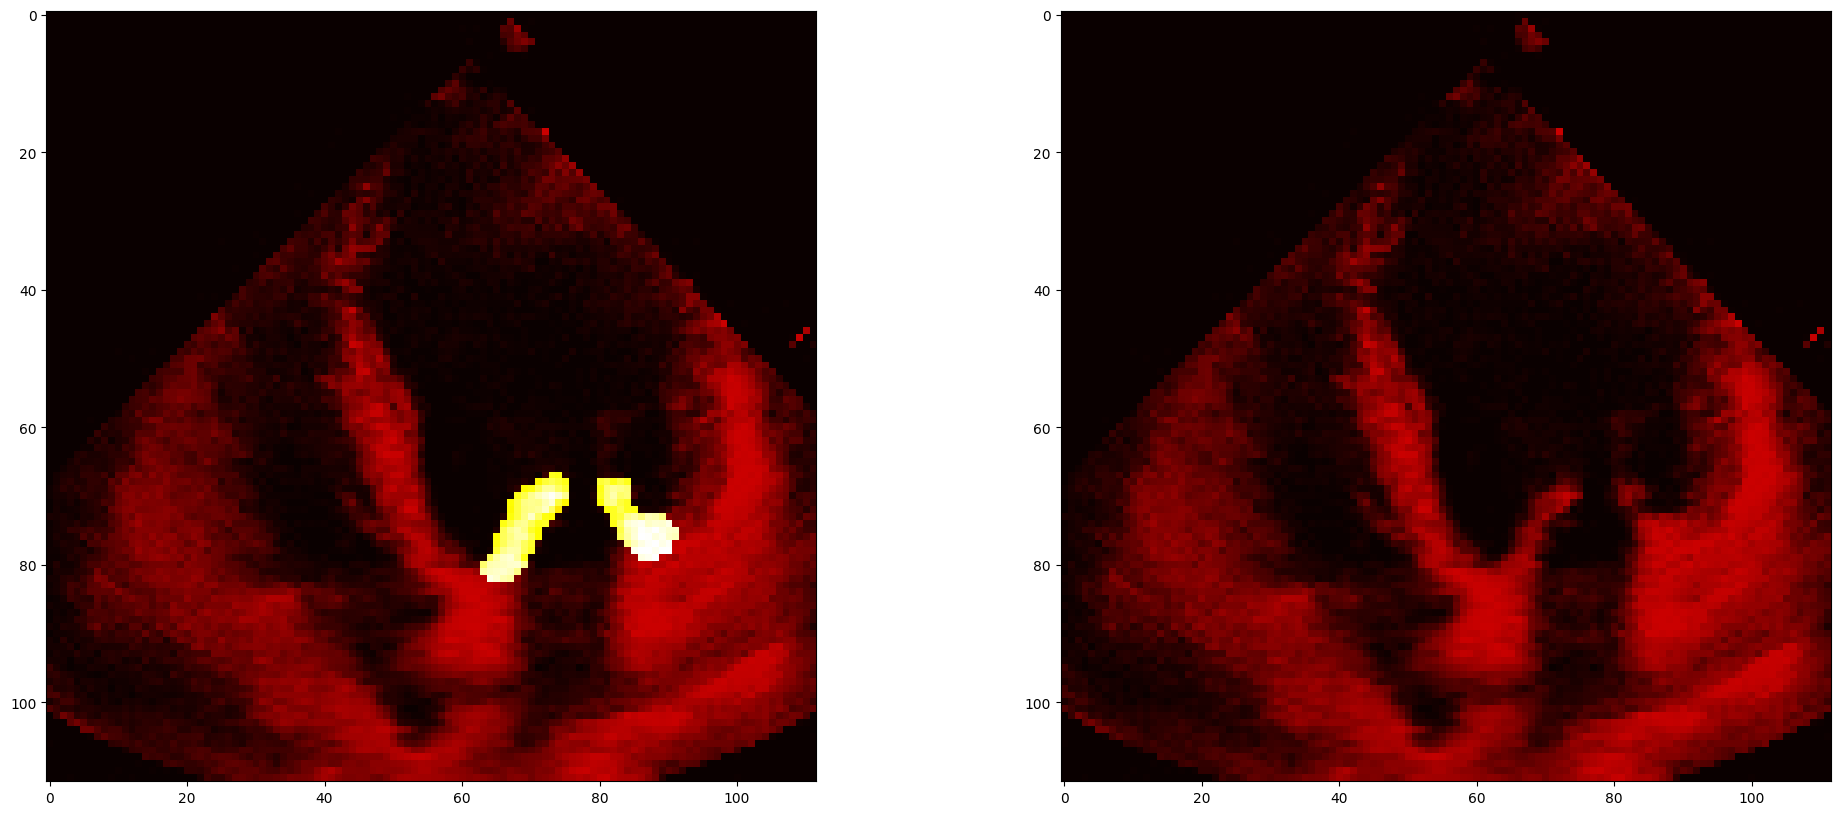

In [481]:
a = next(test_generator)
b = np.where(unet_model.predict(a)>0.5, 1, 0)

for i in range(batch_size):
    plt.figure(figsize=(24, 10))
    plt.subplot(1, 2, 1)
    plt.imshow(a[i] + 5*b[i], cmap='hot', vmin=-1, vmax=6)
    plt.subplot(1, 2, 2)
    plt.imshow(a[i], cmap='hot', vmin=-1, vmax=6)
    plt.show()
    clear_output(wait=True)
    time.sleep(1)

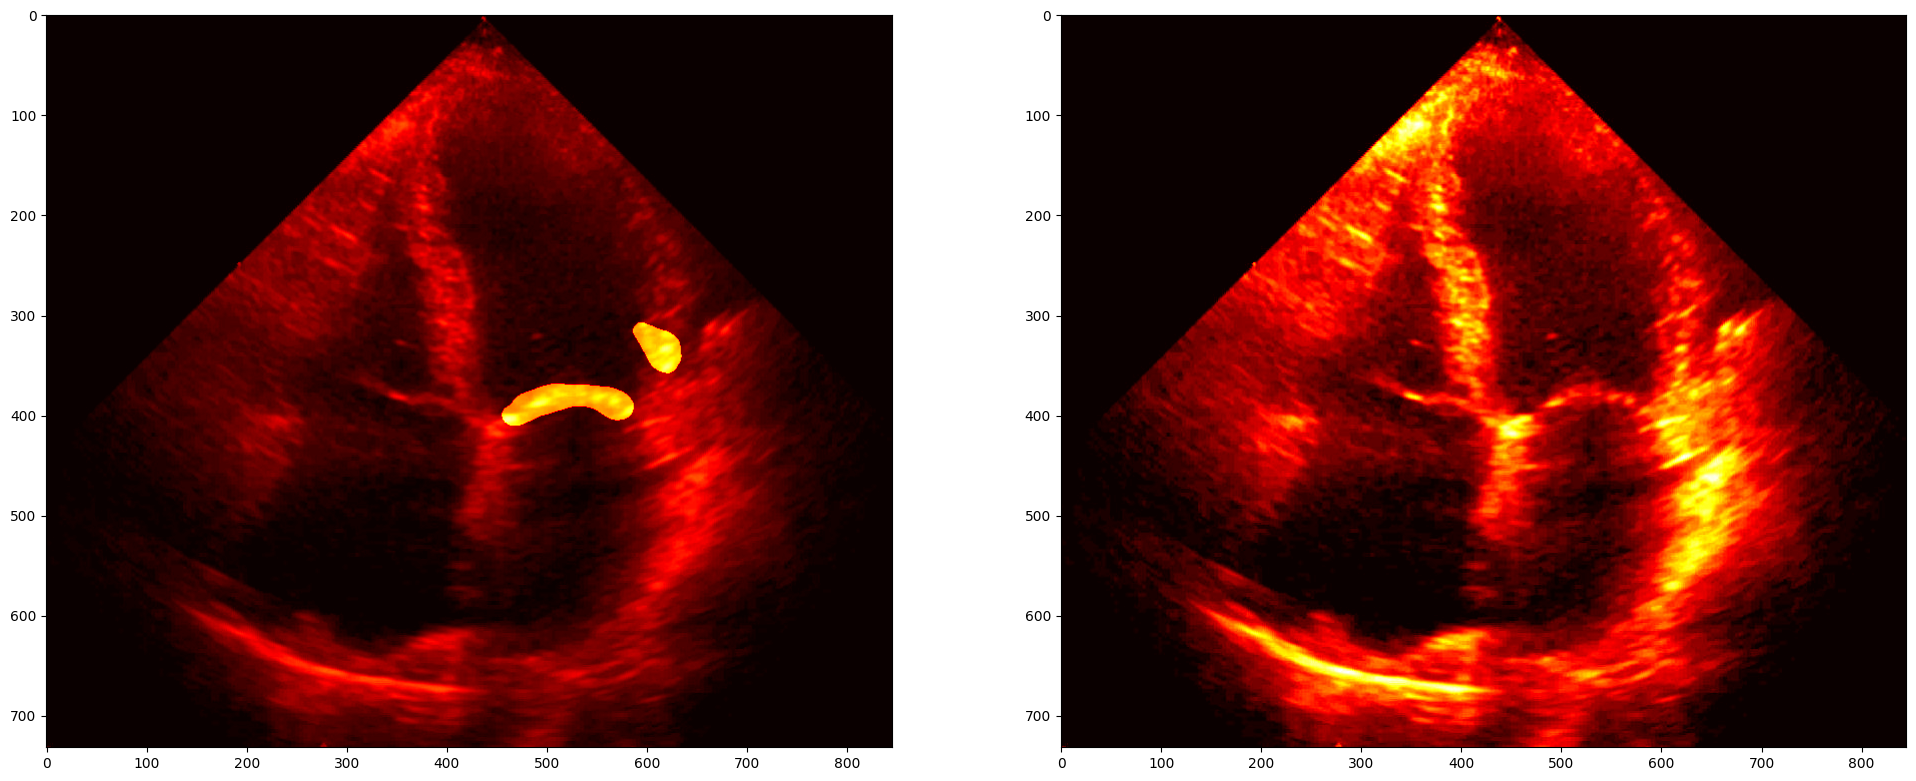

In [489]:
ind = 4

video = test_data[ind]['video']

video_gray = cv2.resize(video, IMG_SIZE, interpolation = cv2.INTER_LANCZOS4).astype(np.uint8)
video_gray = preprocessing_function(video_gray).transpose(2,0,1)
video_gray = video_gray.reshape(*video_gray.shape, 1)

predictions = unet_model.predict(video_gray, verbose=False).transpose(1,2,0,3)[:,:,:,0]
predictions = cv2.resize(predictions, (video.shape[1], video.shape[0]), interpolation = cv2.INTER_LANCZOS4)
predictions = np.where(predictions>.5, True, False)

for i in range(predictions.shape[2]):
    plt.figure(figsize=(24, 10))
    plt.subplot(1, 2, 1)
    plt.imshow(video[:,:,i]/255 + predictions[:,:,i].astype(bool), cmap='hot', vmin=0, vmax=2)
    plt.subplot(1, 2, 2)
    plt.imshow(video[:,:,i]/255, cmap='hot', vmin=0, vmax=1)
    plt.show()
    clear_output(wait=True)
    # time.sleep(.01)

In [490]:
predictions_list = []

for d in test_data:

    video = d['video']

    video_gray = cv2.resize(video, IMG_SIZE, interpolation = cv2.INTER_LANCZOS4).astype(np.uint8)
    video_gray = preprocessing_function(video_gray).transpose(2,0,1)
    video_gray = video_gray.reshape(*video_gray.shape, 1)

    predictions = unet_model.predict(video_gray, verbose=False).transpose(1,2,0,3)[:,:,:,0]
    predictions = cv2.resize(predictions, (video.shape[1], video.shape[0]), interpolation = cv2.INTER_LANCZOS4)
    predictions = np.where(predictions>.5, True, False)

    predictions_list.append({
        'name': d['name'],
        'prediction': predictions
        }
    )

In [491]:
save_zipped_pickle(predictions_list, 'my_predictions.pkl')